# HEALTH INSURANCE RECOMMENDER SYSTEM

# Introduction

Health insurance is a type of insurance that covers the cost of medical expenses, providing financial protection against the high costs of healthcare services and treatments. It plays a crucial role in ensuring access to quality healthcare by reducing the financial burden associated with medical expenses.In Kenya, both public and private health insurance providers exist, with the National Health Insurance Fund (NHIF), now SHA, being the primary public provider, alongside private insurers offering various coverage options. 

The Kenya Demographic and Health Survey (KDHS) 2022 indicates that 26% of Kenyans have some form of health insurance. This includes both public and private health insurance schemes [ICJ Kenyan Section](https://icj-kenya.org/news/soaring-healthcare-costs-in-kenya-hinder-access-to-vital-services/#:~:text=Very%20few%20people%20have%20health,Kenya%20Demographic%20and%20Health%20Survey.)
However, many Kenyans still struggle to find suitable health insurance plans due to limited awareness, affordability issues, and the complexity of comparing different insurance packages. With the rise of data-driven technologies, recommender systems can help individuals select/recommend the most suitable health insurance plans based on their personal needs, financial capability, and medical history. 



# Problem Statement

Selecting an appropriate health insurance plan in Kenya remains a significant challenge due to the vast number of available options, varying coverage levels, and differences in cost. Many individuals and families lack the necessary knowledge to effectively compare plans, often resulting in underinsurance, overinsurance, or a complete lack of coverage. Additionally, insurance providers face difficulties in customer retention and satisfaction due to mismatches between user needs and plan offerings.  

A data-driven health insurance recommender system can help bridge this gap by analyzing user demographics, pre-existing conditions, financial status, employment status, and insurance features** to provide personalized recommendations. This system enhances decision-making by simplifying the selection process and improving access to suitable healthcare coverage. With an emphasis on both user-specific factors and insurance plan characteristics, this project leverages synthetic data based on Kenyan medical insurance trends** to recommend the most suitable insurance provider and plan for each user.  


# Objectives

1. Develop a a personalized health insurance recommender system using collaborative filtering (CF), content-based filtering (CBF), or a hybrid approach to match users with the most suitable plans.


2. Analyze health insurance trends in Kenya by identifying key user specific factors that influence insurance selection, such as demographic, financial, and health-related attributes that impact user preferences and decision-making.


3. Optimize the balance between affordability and coverage adequacy by considering budget constraints, out-of-pocket expenses, and benefit limits in the recommendation process.


4. 

# Data Limitations

1. Incomplete or Missing Data

  Some users may not provide complete information about their health history, income, employment status etc, leading to gaps in data that can affect the accuracy of recommendations.


2. Limited Availability of Real-World Data

  Many health insurance providers do not publicly share their policy details, making it challenging to build a comprehensive dataset.


3. Challenges of Synthetic Data

  Since the dataset is synthetically generated, it may not fully reflect real-world diversity in user behavior, health conditions, and insurance choices. Synthetic data may introduce biases that do not exist in real populations, leading to unrealistic recommendations.



4.  Cold Start Problem
  New users without prior insurance: Users with no previous insurance data (previous_insurance_coverage = No) may struggle to receive personalized recommendations



# Data Understanding

Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read the dataset in the notebook

In [86]:
data_def = pd.read_excel('C:/Users/hp/Desktop/DATA NEXUS PROJECTS/Health-Insurance-Recommender-System/health_insurance_features_definitions.xlsx')
data_def #dataset with column name definitions for easier understanding

,Feature,Definition
0,user_id,Unique identifier for each user
1,age,Age of the user
2,gender,"Gender of the user (Male, Female, Other)"
3,country,Country of residence
4,monthly_income,User's monthly income in USD
5,health_condition,"Primary health condition of the user (e.g., Di..."
6,plan_cost,Monthly cost of the insurance plan in USD
7,deductible_amount,Amount user pays before insurance covers expenses
8,out_of_pocket_max,Maximum amount user pays per year before full ...
9,family_size,Number of dependents in the family


In [3]:
data = pd.read_csv('C:/Users/hp/Desktop/DATA NEXUS PROJECTS/Health-Insurance-Recommender-System/health_insurance_recommender.csv')
data.head() #display the first 5 rows of our dataset

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,None,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,None,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast


In [4]:
data.tail() #display the last 5 rows of our dataset

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
52495,6270,35.0,Male,Kenya,Semi-Urban,Employed,15.893020,None,3,3499.20,...,High School,5,Yes,Yes,Yes,No,Low,50000,Life Healthcare,Slow
52496,2178,41.0,Female,Kenya,Rural,Self-Employed,49.476436,Cancer,3,3036.13,...,Bachelor's,8,Yes,No,Yes,No,High,0,Life Healthcare,Medium
52497,25231,58.0,Other,Kenya,Semi-Urban,Unemployed,2314.782792,HIV,2,4483.59,...,PhD,5,No,Yes,No,Yes,Low,1000000,Mediheal,Slow
52498,8637,50.0,Other,Kenya,Rural,Unemployed,11.434256,Asthma,0,1676.98,...,High School,0,No,Yes,No,No,High,500000,Life Healthcare,Medium
52499,33073,37.0,Other,Kenya,Semi-Urban,Unemployed,10147.409780,HIV,3,855.74,...,PhD,7,No,Yes,Yes,No,High,50000,Mediheal,Medium


In [5]:
data.info() #information about the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [6]:
data.describe().T #statistical summary of the numerical columns

,count,mean,std,min,25%,50%,75%,max
user_id,52500.0,24980.571486,14433.032416,1.000000,12479.750000,24974.500000,37471.250000,50000.000000
age,49859.0,48.535911,17.922048,18.000000,33.000000,48.000000,64.000000,79.000000
monthly_income,49864.0,2229.294781,3993.264625,1.281549,59.004709,611.079480,1360.548180,19434.987400
number_of_dependents,52500.0,2.492286,1.705581,0.000000,1.000000,2.000000,4.000000,5.000000
current_health_expenditure,52500.0,2542.757659,1416.930992,100.030000,1316.652500,2540.765000,3766.235000,4999.990000
plan_cost,52500.0,599.710239,1029.239746,1.260237,22.398519,168.510240,354.352950,4859.763804
deductible_amount,52500.0,113.864270,200.843563,0.126121,3.185938,31.528224,69.125184,971.922240
out_of_pocket_max,52500.0,381.808335,634.008554,1.260728,21.623265,107.380008,215.736066,2915.811432
user_satisfaction_rating,49881.0,3.001423,1.419540,1.000000,2.000000,3.000000,4.000000,5.000000
duplicate_plan_cost,52500.0,27581.730840,13051.249725,5000.160000,16220.612500,27641.475000,38970.142500,49999.710000


In [7]:
data.columns #display the columns in our dataset

Index(['user_id', 'age', 'gender', 'country', 'region', 'employment_status',
       'monthly_income', 'pre_existing_conditions', 'number_of_dependents',
       'current_health_expenditure', 'hospital_preference',
       'previous_insurance_coverage', 'preferred_coverage_type',
       'insurance_provider', 'plan_cost', 'deductible_amount',
       'out_of_pocket_max', 'medication_coverage', 'maternity_coverage',
       'chronic_illness_coverage', 'emergency_coverage', 'dental_coverage',
       'vision_coverage', 'user_satisfaction_rating', 'recommended_plan',
       'policy_expiry_date', 'duplicate_plan_cost', 'duplicate_country',
       'waiting_period_months', 'family_size', 'marital_status',
       'employment_type', 'education_level', 'recent_hospital_visits',
       'smoking_habit', 'alcohol_consumption', 'existing_medications',
       'disability_status', 'co_payment_preference', 'lifetime_coverage_limit',
       'preferred_hospital', 'claim_reimbursement_speed'],
      dtype='obje

In [8]:
data.shape #display the number of rows and columns in our dataset
#our dataset has 52,500 rows and 42 columns

(52500, 42)

In [9]:
data.dtypes.value_counts() #display the datatype count of the columns

object     28
float64     8
int64       6
dtype: int64

# Data Cleaning

Check which columns have missing values

In [10]:
data.isnull().sum() #checking for null values in each column

user_id                           0
age                            2641
gender                            0
country                           0
region                            0
employment_status                 0
monthly_income                 2636
pre_existing_conditions           0
number_of_dependents              0
current_health_expenditure        0
hospital_preference               0
previous_insurance_coverage       0
preferred_coverage_type           0
insurance_provider                0
plan_cost                         0
deductible_amount                 0
out_of_pocket_max                 0
medication_coverage               0
maternity_coverage                0
chronic_illness_coverage          0
emergency_coverage                0
dental_coverage                   0
vision_coverage                   0
user_satisfaction_rating       2619
recommended_plan                  0
policy_expiry_date                0
duplicate_plan_cost               0
duplicate_country           

In [31]:
data.duplicated().sum()

0

There were missing values in the columns; age,monthly income and user_satisfaction_rating

## Cleaning 'Age' column

Check how the Age data is distributed, in order to decide on the best way to hande its missing values

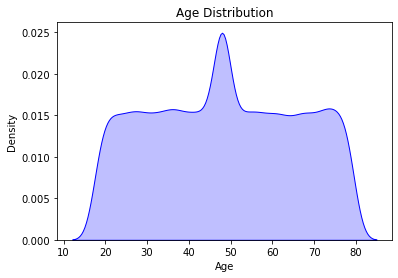

In [32]:
# Plot KDE 
sns.kdeplot(data['age'], shade=True, color='blue')

# Show plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution")
plt.show()

In [33]:
data['age'].fillna(data['age'].median(), inplace=True)

Filled the age column with its median, because the distribution of age was non-normal, and filling with median also helps retain the integrity of the data

In [34]:
data['age'].isna().sum() #confirm that there are no missing values in the age column

0

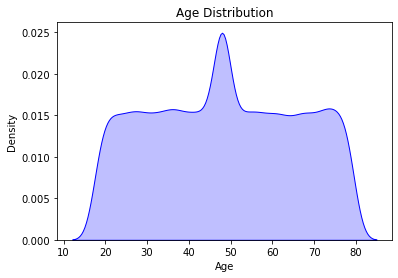

In [35]:
# Plot KDE 
sns.kdeplot(data['age'], shade=True, color='blue')

# Show plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution")
plt.show() #check the distribution of age after imputing

## Cleaning 'Monthly Income' column

In [36]:
data['monthly_income'].fillna(data['monthly_income'].mean(),inplace=True) #fill the missing values in 

In [37]:
data['monthly_income'].isna().sum()  #confirm that there are no missing values in the monthly income column

0

## Cleaning the 'User Satisfaction Rating' column

In [38]:
data['user_satisfaction_rating'].fillna(data['user_satisfaction_rating'].mode()[0],inplace=True)

In [39]:
data['user_satisfaction_rating'].isna().sum()  #confirm that there are no missing values in the user satisfaction rating column

0

## Checking for Outliers

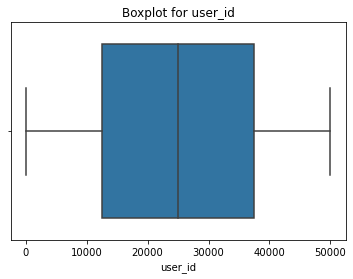

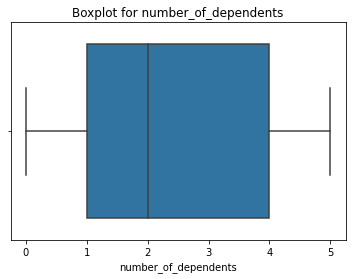

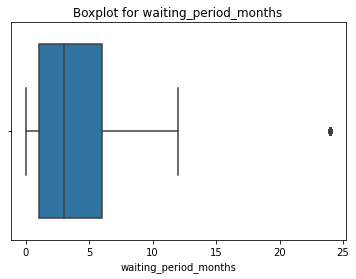

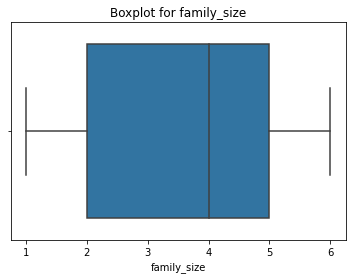

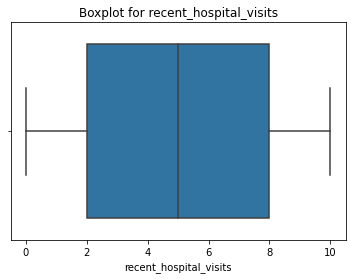

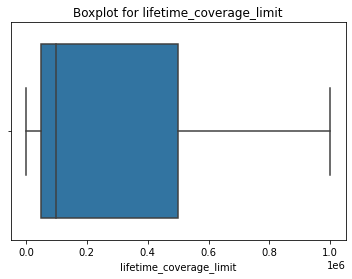

In [40]:
for column in data.select_dtypes(include=['int64']).columns:
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

# Exploratory Data Analysis

The approach I used for Exploatory Data Analysis, was group the columns into User Specific columns and Insurance Plan columns, this is because, when creating a recommender system, there are different approaches to it by using Collaborative Filtering approach, where only user specific columns are used, Content Based Filtering approach, where only insurance plan columns are used and Hybrid Approach where both collaborative filtering and content based filtering can be used

### User Specific Columns EDA

'user_id', 'age', 'gender', 'country', 'region', 'employment_status', 'monthly_income', 'pre_existing_conditions', 'number_of_dependents', 'current_health_expenditure', 'previous_insurance_coverage', 'marital_status', 'education_level', 'recent_hospital_visits', 'smoking_habit', 'alcohol_consumption', 'existing_medications', 'disability_status', 'family_size'

#### Age Column

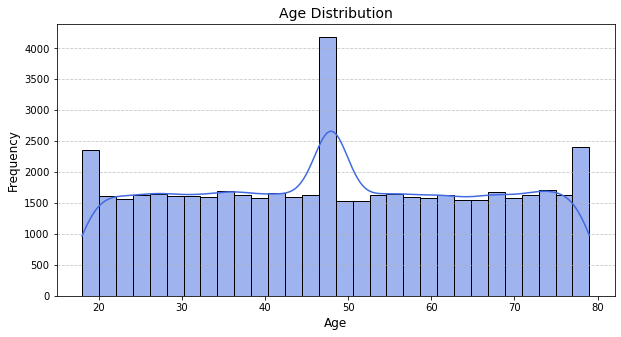

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(data['age'], bins=30, kde=True, color='royalblue')

plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Gender Column

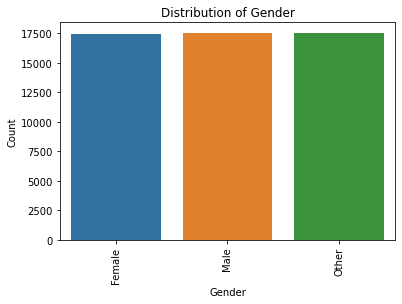

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=data)

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Region Column

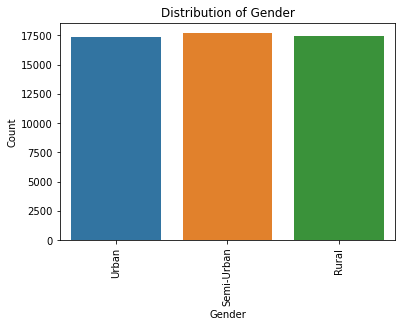

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='region', data=data)

plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Employment Status Column

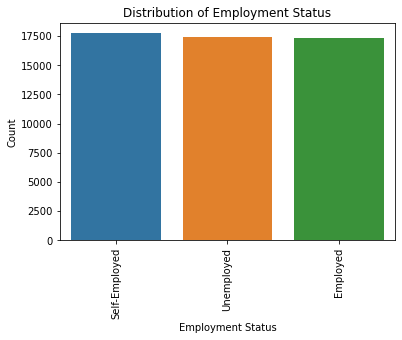

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='employment_status', data=data)

plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Monthly Income Column

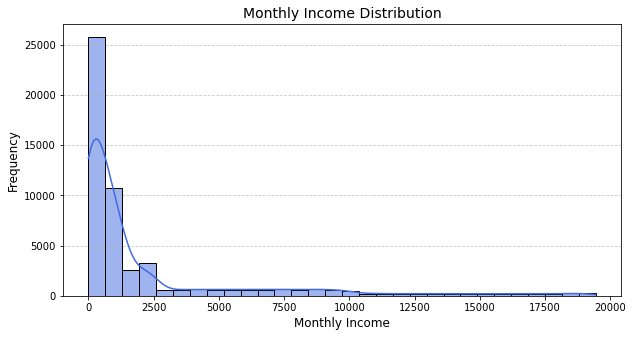

In [66]:
 plt.figure(figsize=(10,5))
sns.histplot(data['monthly_income'], bins=30, kde=True, color='royalblue')

plt.title('Monthly Income Distribution', fontsize=14)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Pre Existing Conditions Column

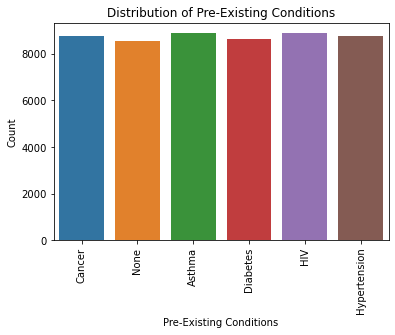

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='pre_existing_conditions', data=data)

plt.title('Distribution of Pre-Existing Conditions')
plt.xlabel('Pre-Existing Conditions')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Marital Status Column

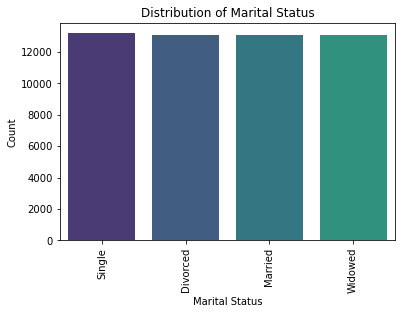

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='marital_status', data=data)

plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Employment Type Column

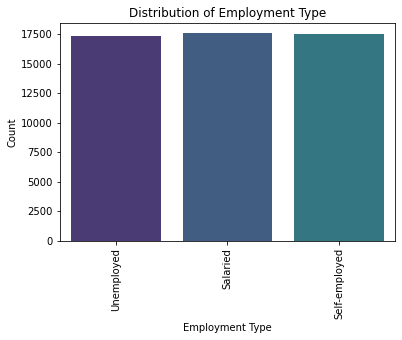

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='employment_type', data=data)

plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Education Level Column

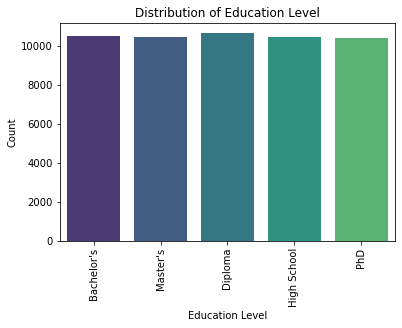

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='education_level', data=data)

plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Previous Insurance Coverage Column

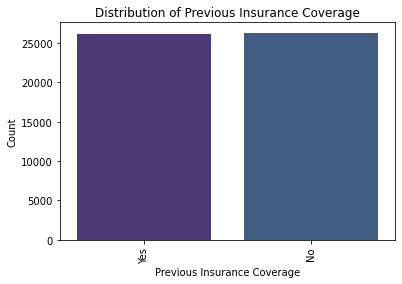

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='previous_insurance_coverage', data=data)

plt.title('Distribution of Previous Insurance Coverage')
plt.xlabel('Previous Insurance Coverage')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Current Health Expenditure Column

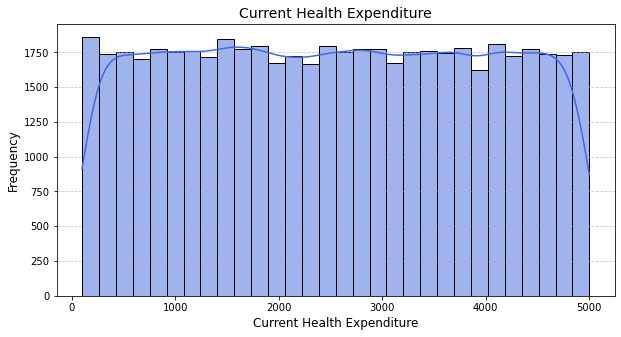

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(data['current_health_expenditure'], bins=30, kde=True, color='royalblue')

plt.title('Current Health Expenditure', fontsize=14)
plt.xlabel('Current Health Expenditure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Insurance Plan Columns EDA

'insurance_provider', 'plan_cost', 'deductible_amount', 'out_of_pocket_max', 'medication_coverage', 'maternity_coverage', 'chronic_illness_coverage', 'emergency_coverage', 'dental_coverage', 'vision_coverage', 'co_payment_preference', 'lifetime_coverage_limit', 'waiting_period_months', 'policy_expiry_date', 'preferred_hospital', 'claim_reimbursement_speed'

#### Insurance Provider Column

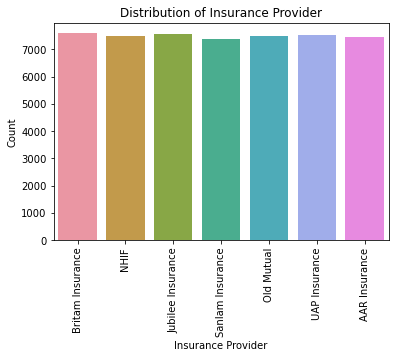

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='insurance_provider', data=data)

plt.title('Distribution of Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Plan Cost Column

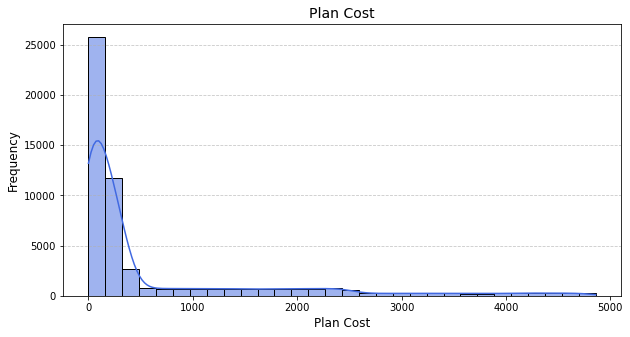

In [69]:
plt.figure(figsize=(10,5))
sns.histplot(data['plan_cost'], bins=30, kde=True, color='royalblue')

plt.title('Plan Cost', fontsize=14)
plt.xlabel('Plan Cost', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Recommended Plan Column

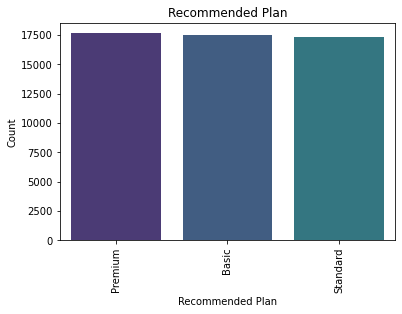

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='recommended_plan', data=data)

plt.title('Recommended Plan')
plt.xlabel('Recommended Plan')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Hospital Preference Column

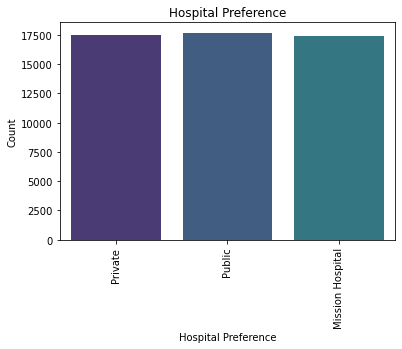

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='hospital_preference', data=data)

plt.title('Hospital Preference')
plt.xlabel('Hospital Preference')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Deductible Amount Column

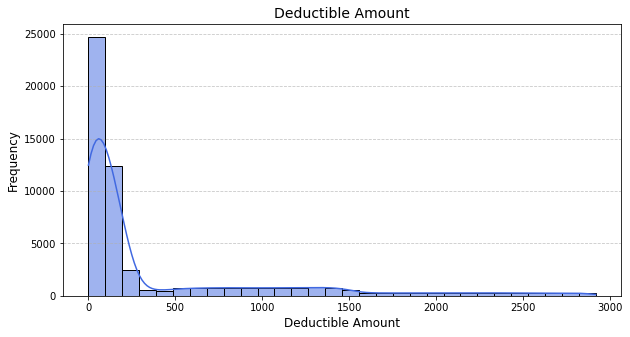

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(data['out_of_pocket_max'], bins=30, kde=True, color='royalblue')

plt.title('Deductible Amount', fontsize=14)
plt.xlabel('Deductible Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Claim Reimbursement Speed Column

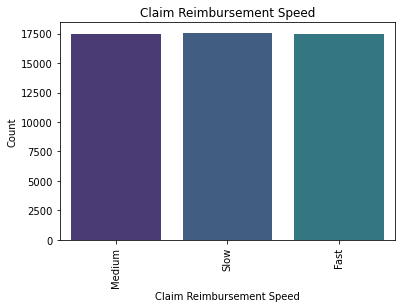

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='claim_reimbursement_speed', data=data)

plt.title('Claim Reimbursement Speed')
plt.xlabel('Claim Reimbursement Speed')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

#### Lifetime Coverage Limit Column

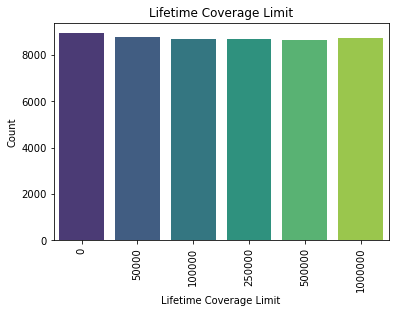

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis")
sns.countplot(x='lifetime_coverage_limit', data=data)

plt.title('Lifetime Coverage Limit')
plt.xlabel('Lifetime Coverage Limit')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Display the plot
plt.show()

### Bivariate Analysis with both User Specific Columns and Insurance Plan Columns